In [109]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
# function takes result file and returns GO_ID and array of coefficients
def get_coeff(input_file):
    results = open(input_file)
    read_coeff = 0
    coeffs = []
    tissues = []
    tissueMap = {}
    for line in results:
        data = line.rstrip('\n').split('\t')
        # print data[0]
        if data[0] == '# Prediction results for:':
            GO_ID = data[1]    
        elif data[0] == '# ROC AUC score:':
            AUC = float(data[1])
        elif data[0] == '# tissue':
            tissues.append(data[2])
            tissueMap[data[2]] = []
        elif data[0] == 'Coefficients:':
            read_coeff = 1
            i = 0           
        elif read_coeff == 1 and (data[0]):
            t_idx = int(data[0])-1
            coeff = float(data[1])
            tissueMap[tissues[t_idx]].append(coeff) 
    input_file.close()
    print GO_ID,'AUC:', AUC
    return [GO_ID, tissueMap, AUC]

def get_all_go_terms(input_file,map_file):
    

In [120]:
# function takes GO term, array of coefficients, and (optional) highlighted tissues, and plots accordingly
def plot_coeff(GO_ID, AUC, tissueMap, highlight = []):
    # samples = open('../data/samples_to_tissues_map.txt')
    # tissue_type = np.loadtxt(samples,dtype='S40',delimiter='\t')
    # tissue_list = pd.unique(tissue_type[:,2]) # pandas maintains correct order, numpy doesn't
    
    tissue_list = []
    coeffs = []
    x = []
    for index, key in enumerate(sorted(tissueMap)):
        tissue_list.append(key)
        for coeff in tissueMap[key]:
            coeffs.append(abs(coeff))
            x.append(index)
    
    # x = [np.where(tissue_list == tissue)[0][0] for tissue in tissue_type[:,2]]
    plt.figure(figsize=(18, 6))
    plt.plot(x, coeffs, 'bo')
    plt.margins(0.01)
    ax = plt.gca()
    ax.xaxis.grid(which='both')
    # You can specify a rotation for the tick labels in degrees or with keywords.
    plt.xticks(range(len(tissue_list)), tissue_list, rotation='vertical')
    # Pad margins so that markers don't get clipped by the axes
    
    # Tweak spacing to prevent clipping of tick-labels
    # plt.subplots_adjust(bottom=0.15)
    plt.show()
    plt.ylabel('some numbers')
    
    """
    tissue_type = np.zeros((8555,3),dtype=np.str)
    row = -1
    
    for sample in samples:
        if row < 0:
            row = row + 1
            continue
        tissue_type[row,:] = sample.split('\t')
    print tissue_type
    """

 GO:0001916  AUC: 0.4489796


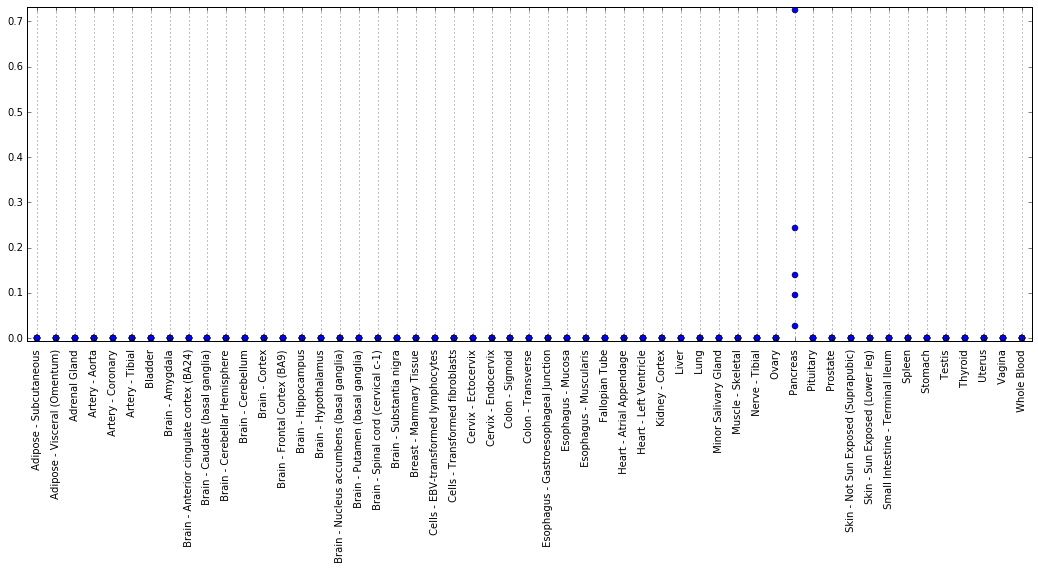

In [121]:


[GO_ID, tissueMap, AUC] = get_coeff('../data/experiment_inputs_subset/grplasso_GO:0001916_0.txt')
plot_coeff(GO_ID, AUC, tissueMap)